In [1]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_ecg_with_activity(ecg_data, sampling_rate, activity_labels, activity_durations):
    """
    Visualize ECG data with two sequences of activity.

    Args:
        ecg_data (array-like): ECG data values.
        sampling_rate (int): Sampling rate of the ECG data in Hz.
        activity_labels (list of str): Labels for the activities (e.g., ["Working", "Resting"]).
        activity_durations (list of float): Duration of each activity in seconds.

    Example:
        ecg_data = np.sin(np.linspace(0, 20 * np.pi, 5000))  # Example ECG-like data
        sampling_rate = 500  # 500 Hz
        activity_labels = ["Working", "Resting"]
        activity_durations = [5, 10]  # 5 seconds of "Working", 10 seconds of "Resting"
        visualize_ecg_with_activity(ecg_data, sampling_rate, activity_labels, activity_durations)
    """
    if len(activity_labels) != len(activity_durations):
        raise ValueError("Activity labels and durations must have the same length.")
    
    # Calculate total duration and ensure ECG data aligns
    total_duration = sum(activity_durations)
    total_samples = len(ecg_data)
    expected_samples = int(total_duration * sampling_rate)
    if total_samples != expected_samples:
        raise ValueError(f"ECG data length ({total_samples}) does not match expected length ({expected_samples}).")
    
    # Generate time axis
    time = np.linspace(0, total_duration, total_samples)
    
    # Plot ECG data
    plt.figure(figsize=(12, 6))
    plt.plot(time, ecg_data, label="ECG Signal", linewidth=1)
    
    # Add activity shading
    start_time = 0
    for label, duration in zip(activity_labels, activity_durations):
        end_time = start_time + duration
        plt.axvspan(start_time, end_time, color='gray' if label == "Working" else 'lightblue', alpha=0.3, label=label)
        start_time = end_time
    
    # Add plot details
    plt.title("ECG Data with Activity Sequences")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()


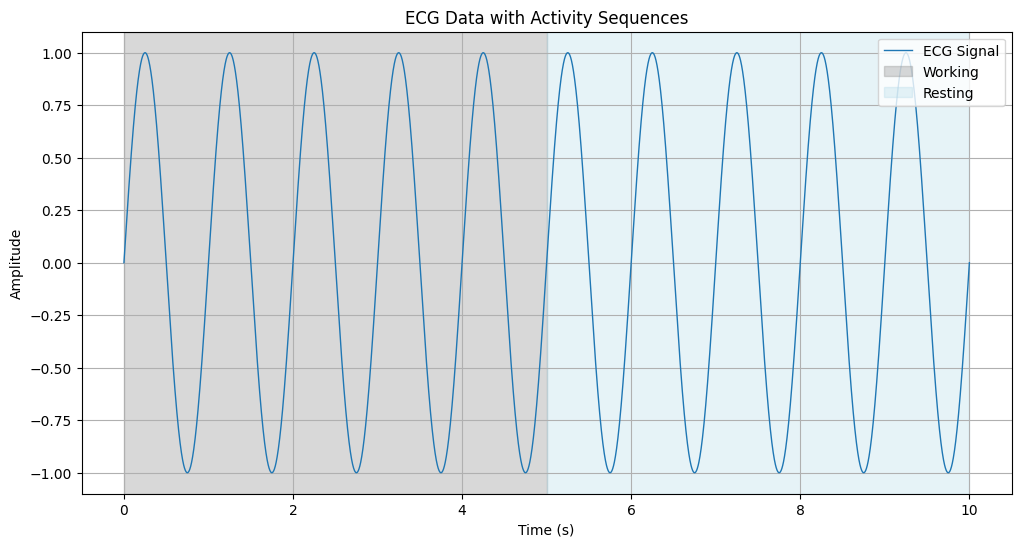

In [2]:
import numpy as np

# Simulated ECG-like data
ecg_data = np.sin(np.linspace(0, 20 * np.pi, 5000))  # 5000 samples
sampling_rate = 500  # 500 Hz

# Activity sequences
activity_labels = ["Working", "Resting"]
activity_durations = [5, 5]  # 5 seconds each

visualize_ecg_with_activity(ecg_data, sampling_rate, activity_labels, activity_durations)
